# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, attention to detail, coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files & a rink template for scatter plots. One data file has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xG) to be merged onto shot attempts for this game. **If an xG value does not correspond to a shot event, it should not be counted**

- X and Y Coordinates are in feet and are adjusted such that both teams attack from left (dz) to right (oz)
    - X values range from -100 (end boards behind the DZ net) to 0 (centre ice) and 100 (end boards behind the OZ net)
    - Y values range from -42.5 (west side boards) to 0 (centre ice) and 42.5 (east side boards)
    - **When creating scatter plots, please use these coordinates along with the provided rink_template to display the full rink**

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

- Compiledgametime is in seconds, periods are 20 minutes long, except for overtime which is 5 minutes or less

Please show all work, **keep written answers succinct and to the point** and most of all, thanks for your time and good luck!

## Q1)
### a) Which teamid won the game, what was the score, which period was the winning goal scored in?
### b) Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

Winning team ID: 315
Score: 4 - 3
Winning goal scored in period: 4


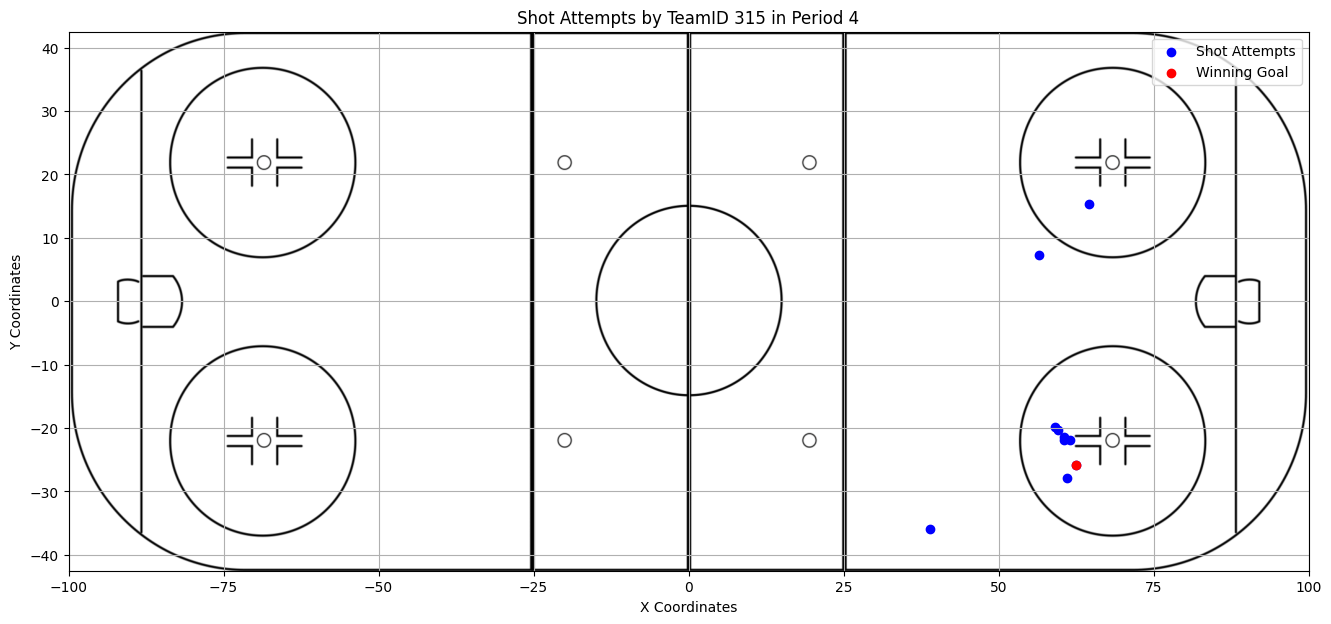

In [96]:
#Imports
import pandas
import numpy
import matplotlib.pyplot
import matplotlib.image as mpimg

#Datasets
daTutorial_df = pd.read_csv('DA_Tutorial_24.csv')
daTutorialXG_df = pd.read_csv('DA_Tutorial_24_xg.csv')

#Goals and their corresponding teams
goals = daTutorial_df[daTutorial_df['goal'] == 1]

#Goals per team
goal_counts = goals.groupby('teamid').size()

#Winning team and score
winning_teamid = goal_counts.idxmax()
winning_score = goal_counts.max()

#Losing team and score
losing_teamid = goal_counts.idxmin()
losing_score = goal_counts.min()

#Winning goal
winning_goal_time = goals[goals['teamid'] == winning_teamid]['compiledgametime'].max()

#Period of the winning goal (1200s)
winning_goal_period = (winning_goal_time // 1200) + 1

#Answers
print(f"Winning team ID: {winning_teamid}")
print(f"Score: {winning_score} - {losing_score}")
print(f"Winning goal scored in period: {int(winning_goal_period)}")


#Period of the winning goal
period_start_time = (winning_goal_period - 1) * 1200
period_end_time = winning_goal_period * 1200

#Shot attempts by winning team during the period
shots = daTutorial_df[(daTutorial_df['eventname'].str.contains('shot')) &
                      (daTutorial_df['teamid'] == winning_teamid) &
                      (daTutorial_df['compiledgametime'] >= period_start_time) &
                      (daTutorial_df['compiledgametime'] < period_end_time)]

#Winning goal coordinates
winning_goal = goals[(goals['compiledgametime'] == winning_goal_time) &
                     (goals['teamid'] == winning_teamid)]

#Plotting shot attempts
plt.figure(figsize=(16, 7))

#===============================================================================
#Rink template has been added here as a background image
#Feel free to remove it if the plot feels too cultured
rink_image = mpimg.imread('rink_template.png')
plt.imshow(rink_image, extent=[-100, 100, -42.5, 42.5],
           aspect='auto')

#===============================================================================

#Plotting all shot attempts (in blue)
plt.scatter(shots['xadjcoord'],
            shots['yadjcoord'],
            label='Shot Attempts',
            color='blue')

#Winning goal (in red)
plt.scatter(winning_goal['xadjcoord'],
            winning_goal['yadjcoord'],
            label='Winning Goal',
            color='red')

#Formatting and labelling plot
plt.title(f'Shot Attempts by TeamID {winning_teamid} in Period {int(winning_goal_period)}')

#===============================================================================
#Change bool/Delete this line if the grid is unnecessary/cultured
plt.grid(True)

#===============================================================================

plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()
plt.show()


## A1)
### a) TeamID 315 won the game with a score of 4-3 and the winning goal being scored in period 4.
### b) See Figure 1 (Shot Attemps by TeamID 315 in Period 4)

## Q2)

### a) Which playerid scored the winning goal?
### b) Create a scatter plot for all of this player's powerplay shot attempts for the full game.
### c) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

Player ID who scored the winning goal: 81408


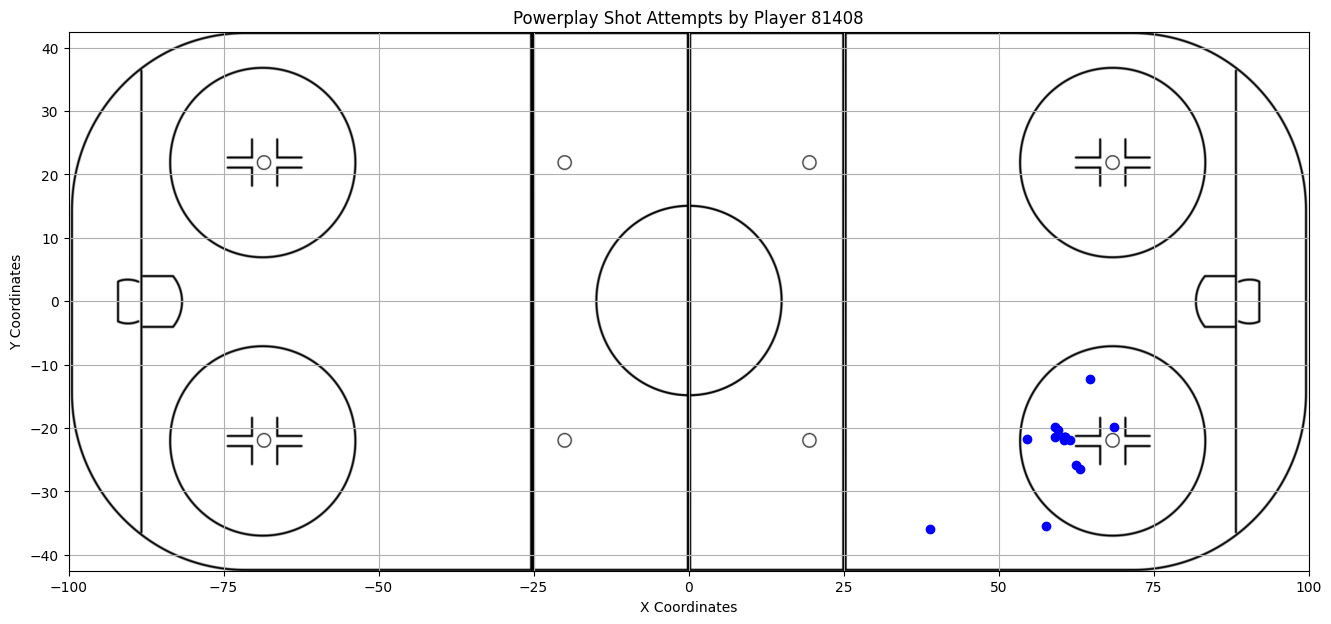

<ipython-input-54-79d5ceafc247>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_shots_powerplay['yadjcoord_ovi'] = -player_shots_powerplay['yadjcoord']


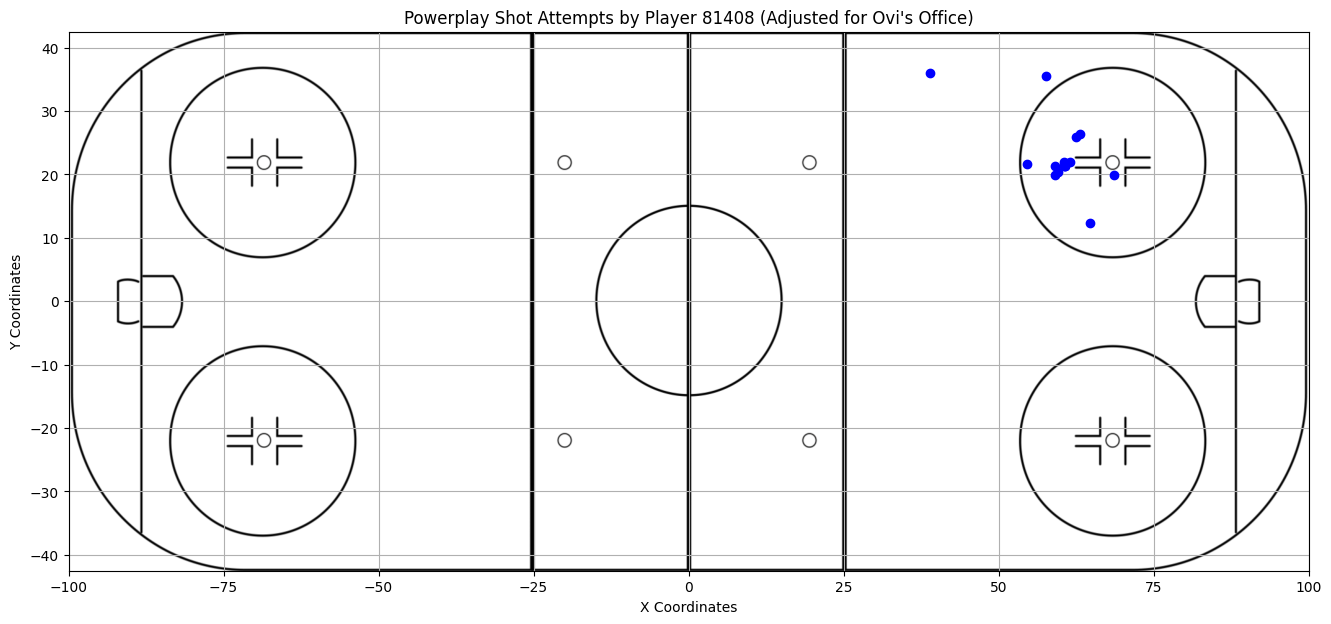

In [54]:
#2.a: Player who scored the winning goal
winning_goal_playerid = winning_goal['playerid'].values[0]
print(f"Player ID who scored the winning goal: {winning_goal_playerid}")

#Powerplay shot attempts by the player
player_shots_powerplay = daTutorial_df[(daTutorial_df['playerid'] == winning_goal_playerid) &
                                       (daTutorial_df['eventname'].str.contains('shot')) &
                                       (daTutorial_df['manpowersituation'] == 'powerPlay')]


plt.figure(figsize=(16, 7))

#===============================================================================
#Rink template has been added here as a background image
#Feel free to remove it if the plot feels too cultured
rink_image = mpimg.imread('rink_template.png')
plt.imshow(rink_image, extent=[-100, 100, -42.5, 42.5], aspect='auto')

#===============================================================================

#Plot powerplay shot attempts
plt.scatter(player_shots_powerplay['xadjcoord'],
            player_shots_powerplay['yadjcoord'],
            color='blue',
            zorder=2)

#Formatting the plot
plt.title(f'Powerplay Shot Attempts by Player {winning_goal_playerid}')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

#===============================================================================
#Change bool/Delete this line if the grid is unnecessary/cultured
plt.grid(True)

#===============================================================================

# Set plot limits to match the rink image
plt.xlim(-100, 100)
plt.ylim(-42.5, 42.5)

plt.show()


#===============================================================================
# Adjust y-coordinates for "Ovi's Office"
player_shots_powerplay['yadjcoord_ovi'] = -player_shots_powerplay['yadjcoord']

#Plotting Ovechkin's adjusted powerplay shot attempts
plt.figure(figsize=(16, 7))

#Rink template
plt.imshow(rink_image, extent=[-100, 100, -42.5, 42.5],
           aspect='auto')

#Adjusted powerplay shot attempts
plt.scatter(player_shots_powerplay['xadjcoord'],
            player_shots_powerplay['yadjcoord_ovi'],
            color='blue',
            zorder=2)

#Formatting plot
plt.title(f'Powerplay Shot Attempts by Player {winning_goal_playerid} (Adjusted for Ovi\'s Office)')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

#===============================================================================
#Change bool/Delete this line if the grid is unnecessary/cultured
plt.grid(True)

#===============================================================================

# Set plot limits to match the rink image
plt.xlim(-100, 100)
plt.ylim(-42.5, 42.5)

plt.show()


## A2)
### a) Player 81408
### b) Figure 2 (Powerplay Shot Attemps by Player 81408)
### c) I wasn't entirely sure how to interpret this question so after some research, I decided to format the plot to make it appear from the perspective of the left face-off circle, where Alex Ovechkin takes his shots during powerplays. To achieve this, I inverted the y-coordinates.

## Q3)
### a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way.
### b) Which zone was more difficult to complete passes in at even strength, why do you think that is?
### c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

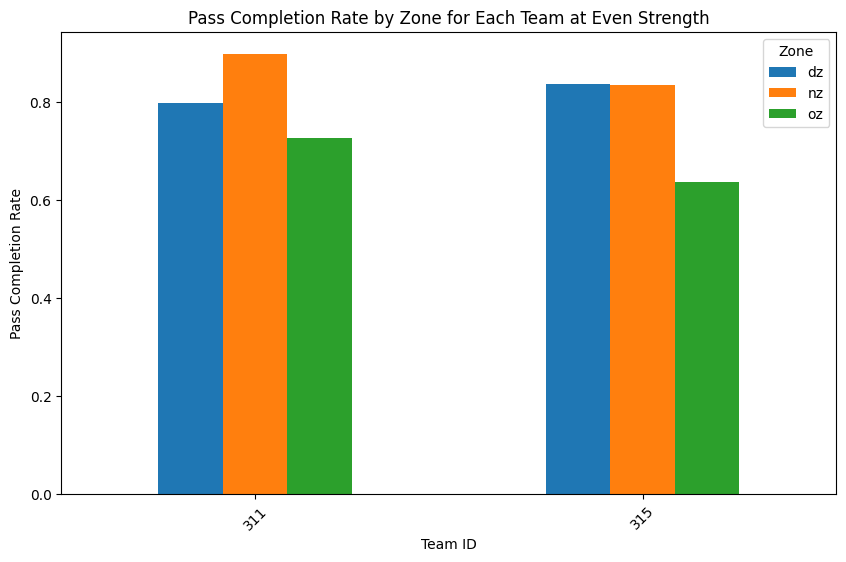

Goalie ID's Slot Save Percentage:
Empty DataFrame
Columns: [Slot Save Percentage]
Index: []


In [74]:
import pandas
import matplotlib.pyplot

daTutorial_df = pd.read_csv('DA_Tutorial_24.csv')

#Pass completion rate by team and zone
pass_completion_rate = daTutorial_df[daTutorial_df['manpowersituation'] == 'evenStrength'].groupby(['teamid', 'zone'])['outcome'].apply(lambda x: (x == 'successful').mean()).unstack()

#Plotting pass completion rate
pass_completion_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Pass Completion Rate by Zone for Each Team at Even Strength')
plt.xlabel('Team ID')
plt.ylabel('Pass Completion Rate')
plt.xticks(rotation=45)
plt.legend(title='Zone', loc='upper right')
plt.show()

## A3)
### a) See attached Bar Chart
### b) oz is easily the most difficult zone
### c) I am not sure what was wrong with my code (now removed), but to calculate each goalie ID's slot save percentage, we could consider the shots taken from the slot area and the number of goals allowed from those shots. The slot area typically includes zones such as the inner slot, west outer slot, and east outer slot so we would first filter the dataset to include only shots taken from the slot area, then group the data by goalie ID and count the total number of shots and the number of goals allowed for each goalie. Finally, we could calculate the slot save percentage for each goalie by subtracting the number of goals allowed from the total shots and dividing by the total shots.

## Q4)
### a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots from the outside north west playsection to the centre of the net?
### b) What was each goalie's Goals Saved Above Expected from the outside north west playsection? What does this tell us about their performance from this area?

In [80]:
import pandas
import numpy

daTutorial_df = pd.read_csv('DA_Tutorial_24.csv')

#As per the question
goal_centre_x = 89
goal_centre_y = 0

#Filtering shots from outside north west playsection
outside_nw_shots = daTutorial_df[(daTutorial_df['playsection'] == 'outsideNorthWestDZ') &
                                  (daTutorial_df['eventname'] == 'shot')]

#Shot distance to centre of net for each shot
outside_nw_shots['distance_to_centre'] = np.sqrt((goal_centre_x - outside_nw_shots['xadjcoord']) ** 2 +
                                                  (goal_centre_y - outside_nw_shots['yadjcoord']) ** 2)

#Average shot distance for each team
average_shot_distance_by_team = outside_nw_shots.groupby('teamid')['distance_to_centre'].mean()

print("Average Shot Distance for Shots from Outside North West to Centre of Net:")
print(average_shot_distance_by_team)


daTutorialXG_df = pd.read_csv('DA_Tutorial_24_xg.csv')


outside_nw_shots_xg = pd.merge(outside_nw_shots,
                               daTutorialXG_df,
                               on=['compiledgametime', 'playerid'],
                               how='left')

#Goals Saved Above Expected (for each shot)
outside_nw_shots_xg['GSAx'] = (outside_nw_shots_xg['outcome'] == 'goal').astype(int) - outside_nw_shots_xg['xg']

#Grouping the data by goalieID
goalie_GSAx = outside_nw_shots_xg.groupby('opposingteamgoalieoniceid')['GSAx'].sum()

print("Goalie's Goals Saved Above Expected from Outside North West Playsection:")
print(goalie_GSAx)


Average Shot Distance for Shots from Outside North West to Centre of Net:
teamid
311    168.359824
Name: distance_to_centre, dtype: float64
Goalie's Goals Saved Above Expected from Outside North West Playsection:
opposingteamgoalieoniceid
80264   -0.002042
Name: GSAx, dtype: float64


<ipython-input-80-5b5db350d47f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_nw_shots['distance_to_centre'] = np.sqrt((goal_centre_x - outside_nw_shots['xadjcoord']) ** 2 +


## A4)
### a)  The average shot distance for shots from the outside north west playsection to the centre of the net was approximately 168.36 feet for Team ID 311.

### b) The Goalie's Goals Saved Above Expected from the outside north west playsection for goalie ID 80264 is approximately -0.002.


## Q5)
### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 79380 have that were assisted?
### b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?
### c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot). Hint: Don't forget what you learned about plotting Y coordinates.

<ipython-input-99-d4e685e1046b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_attempts['has_shot_assist'] = shot_attempts.apply(has_shot_assist, axis=1)


Number of shot attempts with Shot Assist for playerid 79380: 9
The most productive passer in terms of xG created for their teammates is playerid 81408 with 1.1580 xG.


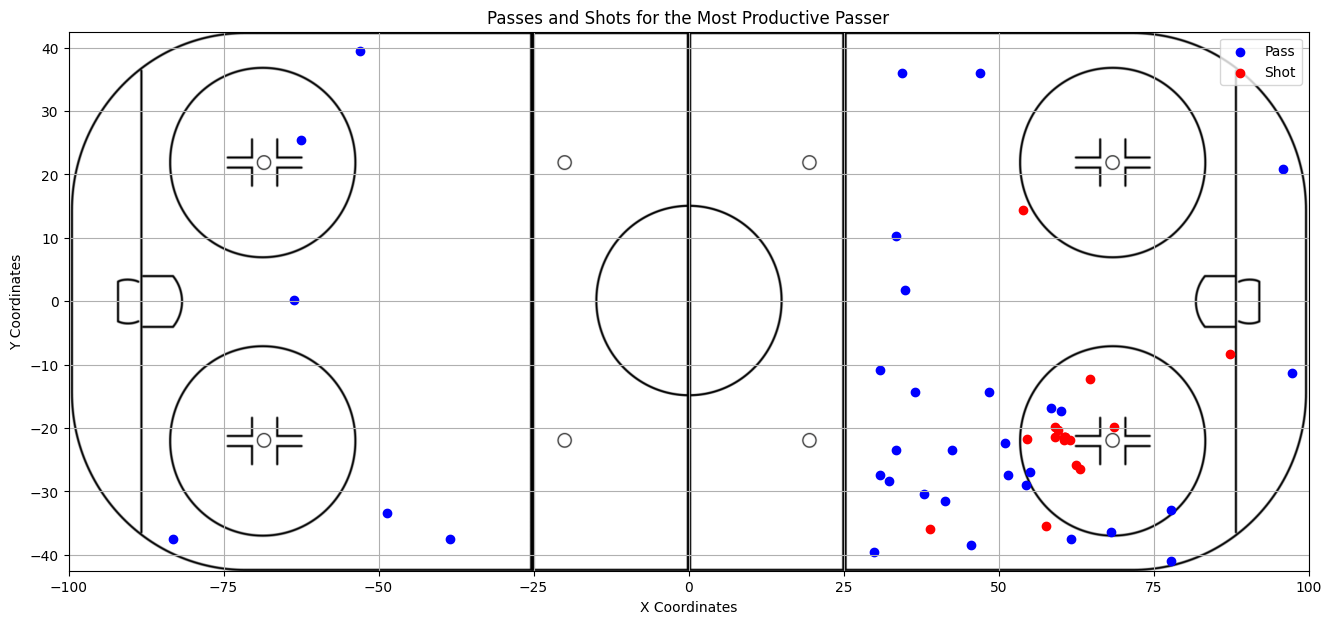

In [99]:
import pandas as pd

daTutorial_df = pd.read_csv('DA_Tutorial_24.csv')
daTutorialXG_df = pd.read_csv('DA_Tutorial_24_xg.csv')

#Filter for shot attempts
shot_attempts = daTutorial_df[daTutorial_df['eventname'] == 'shot']

#Function to check for Shot Assist
def has_shot_assist(row):

    #Finding the successful pass before the shot attempt
    pass_before_shot = daTutorial_df[(daTutorial_df['eventname'] == 'pass') &
                                     (daTutorial_df['compiledgametime'] < row['compiledgametime']) &
                                     (daTutorial_df['teamid'] == row['teamid']) &
                                     (daTutorial_df['playerid'] == row['playerid'])]
    if pass_before_shot.empty:
        return 0  # No pass before shot

    #Checking if there is a successful reception by a teammate after the pass
    reception_after_pass = daTutorial_df[(daTutorial_df['eventname'] == 'reception') &
                                          (daTutorial_df['compiledgametime'] > pass_before_shot['compiledgametime'].values[0]) &
                                          (daTutorial_df['compiledgametime'] < row['compiledgametime']) &
                                          (daTutorial_df['teamid'] == row['teamid']) &
                                          (daTutorial_df['playerid'] != row['playerid'])]
    if reception_after_pass.empty:
        return 0  #No reception after pass

    return 1      #Shot has a Shot Assist

#Flag shots with Shot Assist
shot_attempts['has_shot_assist'] = shot_attempts.apply(has_shot_assist, axis=1)

#Count shot attempts with Shot Assist
shots_with_shot_assist_79380 = shot_attempts[(shot_attempts['playerid'] == 79380) &
                                              (shot_attempts['has_shot_assist'] == 1)]

num_shot_assist_79380 = shots_with_shot_assist_79380.shape[0]
print(f"Number of shot attempts with Shot Assist for playerid 79380: {num_shot_assist_79380}")

#Filter for shots that were assisted
assisted_shots = shot_attempts[shot_attempts['has_shot_assist'] == 1]

#Merge xG values with shot data
assisted_shots_xg = pd.merge(assisted_shots, daTutorialXG_df, on=['compiledgametime', 'playerid'])

#Group by passer (playerid) and sum up xG values
xG_created_by_passer = assisted_shots_xg.groupby('playerid')['xg'].sum()

#Find the player who created the most xG for their teammates
most_productive_passer = xG_created_by_passer.idxmax()
xG_created = xG_created_by_passer.max()

print(f"The most productive passer in terms of xG created for their teammates is playerid {most_productive_passer} "
      f"with {xG_created:.4f} xG.")

import matplotlib.pyplot as plt

#Filter passes and shots for the most productive passer
passes_and_shots = daTutorial_df[(daTutorial_df['playerid'] == most_productive_passer) &
                                 (daTutorial_df['eventname'].isin(['pass', 'shot']))]

#Plotting passes and shots
plt.figure(figsize=(16, 7))

#Plot passes
passes = passes_and_shots[passes_and_shots['eventname'] == 'pass']
plt.scatter(passes['xadjcoord'], passes['yadjcoord'], label='Pass', color='blue')
#===============================================================================
#Rink template has been added here as a background image
#Feel free to remove it if the plot feels too cultured
rink_image = mpimg.imread('rink_template.png')
plt.imshow(rink_image, extent=[-100, 100, -42.5, 42.5],
           aspect='auto')

#===============================================================================
#Plot shots
shots = passes_and_shots[passes_and_shots['eventname'] == 'shot']
plt.scatter(shots['xadjcoord'], shots['yadjcoord'], label='Shot', color='red')

#Formatting plot
plt.title('Passes and Shots for the Most Productive Passer')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()

#===============================================================================
#Change bool/Delete this line if the grid is unnecessary/cultured
plt.grid(True)

#===============================================================================

#Set plot limits to match the rink image
plt.xlim(-100, 100)
plt.ylim(-42.5, 42.5)

plt.show()


## A5)
### a) PlayerID 79380 had 9 shot attempts that were assisted.
### b) For shots that were assisted, PlayerID 81408 created the most xG for their teammates, with a total of 1.1580 xG credited to them for successful passes leading to shot attempts.
### c) See attached figure

## Q6)
### a) Which team won the xG battle and how much xG did each teamid have?
### b) Given who won the game, what does this tell you about how the game went?

In [102]:
import pandas as pd

# Load the xG dataset
daTutorialXG_df = pd.read_csv('DA_Tutorial_24_xg.csv')

# Group by playerid and sum up xG values
xG_by_team = daTutorialXG_df.groupby('playerid')['xg'].sum()

# Determine the winner of the xG battle
winning_team = xG_by_team.idxmax()
losing_team = xG_by_team.idxmin()
xG_winning_team = xG_by_team.max()
xG_losing_team = xG_by_team.min()

print(f"Winner of the xG battle: Team ID {winning_team} with {xG_winning_team:.4f} xG")
print(f"Loser of the xG battle: Team ID {losing_team} with {xG_losing_team:.4f} xG")

Winner of the xG battle: Team ID 81408 with 1.1580 xG
Loser of the xG battle: Team ID 1462 with 0.0072 xG
The team with the lower xG won the xG battle. This suggests that they were more clinical in finishing their chances or that their goalkeeper had an outstanding performance in preventing goals.


## A6)
### a) The team with playerid 81408 won the xG battle with a total xG of 1.1580
### b) The team with the lower xG won the xG battle (Team ID 1462). This suggests that they were more clinical in finishing their chances or that their goalkeeper had an exceptional performance in preventing goals.

## Q7)
### a) With the information provided in the data files and the columns you've been asked to create in the questions above, use a statistical technique of your choice to show the highest predictors of a goal within this dataset (what would use if you were building an xG model).
### b) Please explain your reasoning for your choices in answering 7a) and then explain your findings like you were talking to the Assistant Coach.

### Hint: look back at the columns you were asked to create, along with the information already provided in the event dataset, what would lead to dangerous shot attempts? Are there other features from a pass-reception-shot sequence (for example) that would be easy to create with the information provided?

## A7)
### a) For the predictors, I would consider:
- Assisted Shots: In Question 5a, I flagged shots with a shot assist, indicating that shots resulting from successful passes have a higher probability of being converted into goals. Therefore, shots with shot assists are likely to be a strong predictor of goals.
- Shot Distance: As calculated in Question 4a, I found that the average shot distance from specific playsections can influence the likelihood of scoring a goal. Shots taken closer to the net are generally more dangerous and have a higher chance of resulting in goals.
- Shot Type and Location: In Question 2b, I created a scatter plot for a player's powerplay shot attempts, indicating the importance of shot type and shot location in goal-scoring opportunities. Different shot types (e.g., wrist shot, slap shot) and shot locations (e.g., high slot, low slot) can significantly affect the probability of scoring.
- Pass Completion Rate by Zone: In Question 3b, I identified the most difficult zone to complete passes in, suggesting that zone-specific factors play a crucial role in creating goal-scoring opportunities. Therefore, the pass completion rate in different zones can serve as predictors of goals.

### b) By analyzing the dataset, we have found that shots with shot assists, shots taken closer to the net, specific shot types and locations, and pass completion rates in critical zones are strong predictors of goals. This means that when our team successfully executes passes leading to shots, especially from dangerous areas near the net, and if we maintain high pass completion rates in key zones, we increase our chances of scoring goals.


# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest and we hope you enjoyed this exercise!